In [1]:
import pandas as pd 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
Cancer_Disease=load_breast_cancer(as_frame=True)

# Description et Exploration des données

In [3]:
#DEscription générale de la base de données 
print(Cancer_Disease['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
#Nom classes à prédire
Cancer_Disease.target_names


array(['malignant', 'benign'], dtype='<U9')

In [5]:
#les attributs du Dataframe
Cancer_Disease.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
#Etude des différents types de données
#on remarque que la majorité des données est de type réel alors que pour notre target le type est entier
Cancer_Disease.frame.info()
#pas de valeurs nulles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
#statistiques pour chaque colonne 
Cancer_Disease.frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


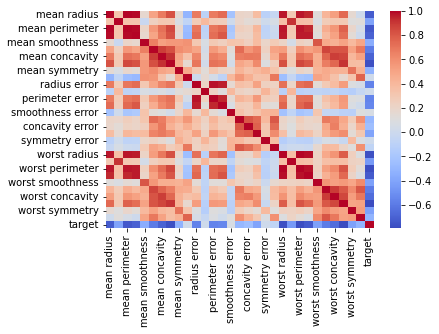

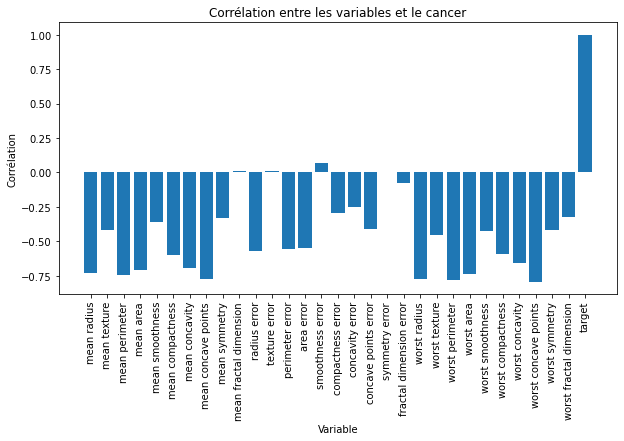

In [8]:
#Etablissement d'une matrice de corrélation entre les attributs 
Corrmatrix=Cancer_Disease.frame.corr()
correlations = Cancer_Disease.frame.corrwith(Cancer_Disease.frame.target)
sns.heatmap(Corrmatrix, cmap="coolwarm",)
plt.figure(figsize=(10, 5))
plt.bar(correlations.index, correlations)
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Corrélation')
plt.title('Corrélation entre les variables et le cancer')
plt.show()


<AxesSubplot:xlabel='worst radius', ylabel='mean perimeter'>

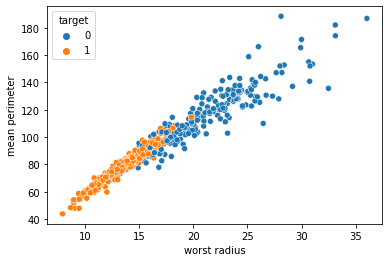

In [9]:
#Vérification de la corrélation entre worst radius et mean perimeter
sns.scatterplot(data=Cancer_Disease,x=Cancer_Disease.frame['worst radius'],y=Cancer_Disease.frame['mean perimeter'],hue=Cancer_Disease.target)

# Création du modèle MLP Classifier

In [10]:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


In [11]:
X=Cancer_Disease.data
y=Cancer_Disease.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
    #préparation des ensembles train et test#normalisation des données pour obtenir un meilleur score après l'entrainement
from sklearn.preprocessing import StandardScaler

Scaler=StandardScaler()
Scaler.fit(X_train)
X_train=Scaler.transform(X_train)
X_test=Scaler.transform(X_test)


In [13]:
#normalisation des données pour obtenir un meilleur score après l'entrainement
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaler.fit(X_train)
X_train=Scaler.transform(X_train)
X_test=Scaler.transform(X_test)

In [14]:
#Entrainement du modèle 
MLP=MLPClassifier(hidden_layer_sizes=(40,40,40))
MLP.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(40, 40, 40))

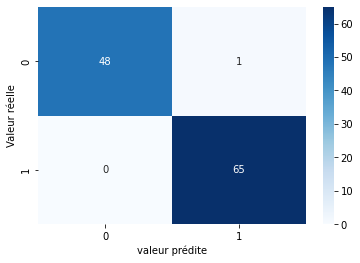

In [15]:
#Evaluation du modèle avec la matrice de confusion et le rapport de classification
Y_pred=MLP.predict(X_test)
cm=confusion_matrix(Y_pred,y_test)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('valeur prédite')
plt.ylabel('Valeur réelle')
plt.show()



In [16]:
print(classification_report(Y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      1.00      0.99        65

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# Optimisation des  hyperparamètres avec GridsearchCV

In [17]:
from sklearn.model_selection import GridSearchCV


In [18]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100),(30,30,30)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}


In [19]:
mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)


In [ ]:
grid_search.fit(X_train, y_train)


In [ ]:
best_params = grid_search.best_params_
best_mlp = MLPClassifier(**best_params, random_state=42)
print(best_params)

In [ ]:
best_mlp.fit(X_train, y_train)
accuracy = best_mlp.score(X_test, y_test)
print(accuracy)